In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
iran_price = pd.read_csv('dataset/FAO_STAT_iran_producer_prices.csv')
iran_exchange = pd.read_csv('dataset/FAO_STAT_iran_Exchange.csv')
iran_population  = pd.read_csv('dataset/FAO_STAT_iran_population.csv')

In [3]:
iran_price = iran_price.drop(['Domain Code' , 'Domain' , 'Area Code' , 'Area' , 'Element Code' , 'Item Code' , 'Year Code','Flag' , 'Flag Description'] , axis = 1)

In [4]:
home_basket = ['Wheat', "Meat live weight, cattle", "Meat live weight, sheep", "Milk, whole fresh cow ", "Potatoes", "Tomatoes", "Onions, dry",
"Honey, natural", "Tea", "Watermelons", "Sunflower seed", "Soybeans", "Apples", "Rice, paddy", "Eggplants (aubergines)", "Garlic", 
"Fruit, citrus nes", "Fruit, fresh nes", "Vegetables, leguminous nes", "Beans, dry", "Dates", "Lentils", "Oranges", "Tobacco, unmanufactured"]

In [5]:
for row, col in iran_price.iterrows():
    if col['Item'] not in home_basket:
        iran_price.drop(row, axis= 0, inplace= True)
iran_price.reset_index(inplace=True)

In [6]:
del iran_price['index']

In [7]:
iran_exchange = iran_exchange.drop(['Domain Code' , 'Domain' , 'Area Code' , 'Area' , 'ISO Currency Code' ,'Currency' ,'Item' , 'Item Code' , 'Year Code'
           ,'Note',  'Unit'  , 'Flag' , 'Flag Description'] , axis = 1)

In [8]:
iran_exchange['Value'] = iran_exchange['Value'].astype('int64')

In [9]:
new_exchange = {'Year': [2019,2020] , 'Value': [140000 , 180000] }

In [10]:
new_exchange = pd.DataFrame(new_exchange)

In [11]:
iran_exchange = iran_exchange.append(new_exchange)

/home/mars/.local/lib/python2.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [12]:
iran_exchange.reset_index(inplace=True)

In [13]:
del iran_exchange['index']

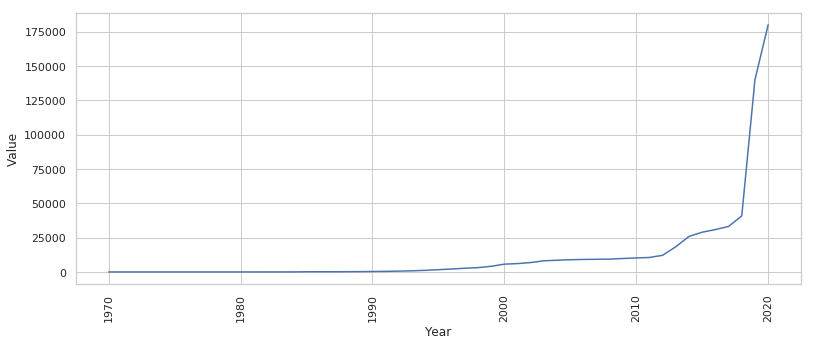

In [14]:
sns.set(style="whitegrid")
plt.figure(figsize=(13, 5))
sns.lineplot(x = 'Year' , y = 'Value' , data = iran_exchange)
plt.ylabel('Value')
plt.xlabel('Year')
plt.xticks(rotation = 90)
plt.show()

In [15]:
iran_price = iran_price.merge(iran_exchange, left_on= "Year", right_on="Year", how= "left", suffixes=(" in Dollars", " Dollar per Rials"))

In [16]:
iran_price['Value in Rials'] = iran_price["Value in Dollars"] * iran_price["Value Dollar per Rials"]

In [17]:
del iran_price['Unit']
del iran_price['Value Dollar per Rials']

In [18]:
iran_price

,Element,Item,Year,Value in Dollars,Value in Rials
0,Producer Price (USD/tonne),Apples,1991,169.0,86359.0
1,Producer Price (USD/tonne),Apples,1992,183.3,120061.5
2,Producer Price (USD/tonne),Apples,1993,131.1,116679.0
3,Producer Price (USD/tonne),Apples,1994,205.4,250793.4
4,Producer Price (USD/tonne),Apples,1995,298.6,515085.0
5,Producer Price (USD/tonne),Apples,1996,219.3,481144.2
6,Producer Price (USD/tonne),Apples,1997,217.7,604988.3
7,Producer Price (USD/tonne),Apples,1998,168.5,540211.0
8,Producer Price (USD/tonne),Apples,1999,203.4,848584.8
9,Producer Price (USD/tonne),Apples,2000,197.7,1133018.7


In [41]:
iran_price["Element"] = iran_price["Element"].str.replace("/", " and RIALS / ")

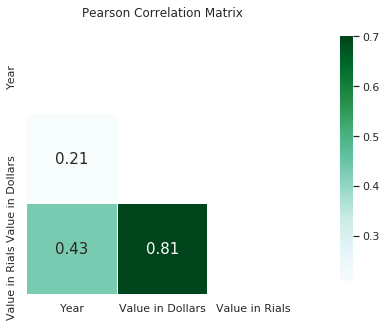

In [42]:
f, ax = plt.subplots(figsize=(15, 5))
mask = np.zeros_like(iran_price.corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True

plt.title('Pearson Correlation Matrix',fontsize=12)

sns.heatmap(iran_price.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", 
            linecolor='w',annot=True,annot_kws={"size":15},mask=mask,cbar_kws={"shrink": .9});

In [44]:
del iran_price['Element']

In [46]:
del iran_price['Value in Dollars']

In [48]:
iran_price['Price per Kg in Rial'] = iran_price['Value in Rials'] / 1000

In [50]:
del iran_price['Value in Rials']

In [69]:
iran_price['Item'].value_counts()

Onions, dry                   28
Wheat                         28
Dates                         28
Potatoes                      28
Apples                        28
Tomatoes                      28
Meat live weight, sheep       28
Sunflower seed                28
Rice, paddy                   28
Lentils                       28
Soybeans                      28
Watermelons                   28
Oranges                       28
Meat live weight, cattle      28
Honey, natural                27
Beans, dry                    27
Tea                           25
Garlic                        23
Eggplants (aubergines)        23
Vegetables, leguminous nes    21
Tobacco, unmanufactured       21
Fruit, citrus nes             16
Fruit, fresh nes              15
Name: Item, dtype: int64

In [72]:
iran_price_Rafsanjani = iran_price[(iran_price['Year'] >= 1991) & (iran_price['Year'] < 1997)]
iran_price_Khatami = iran_price[(iran_price['Year'] >= 1997) & (iran_price['Year'] < 2005)]
iran_price_AhmadiNezhad = iran_price[(iran_price['Year'] >= 2005) & (iran_price['Year'] < 2013)]
iran_price_Rouhani = iran_price[(iran_price['Year'] >= 2013) & (iran_price['Year'] <= 2018)]

In [73]:
iran_price_Rafsanjani.reset_index(inplace=True)
iran_price_Khatami.reset_index(inplace=True)
iran_price_AhmadiNezhad.reset_index(inplace=True)
iran_price_Rouhani.reset_index(inplace=True)

In [74]:
del iran_price_Rafsanjani['index']
del iran_price_Khatami['index']
del iran_price_AhmadiNezhad['index']
del iran_price_Rouhani['index']

In [77]:
iran_price_Rafsanjani.to_csv('Rafsanjani_price.csv', index =False)
iran_price_Khatami.to_csv('Khatami_price.csv', index =False)
iran_price_AhmadiNezhad.to_csv('AhmadiNezhad_price.csv', index =False)
iran_price_Rouhani.to_csv('Rouhani_price.csv', index =False)

In [76]:
iran_price_Rouhani

,Item,Year,Price per Kg in Rial
0,Apples,2013,14679.6408
1,Apples,2014,15193.6437
2,Apples,2015,12808.3565
3,Apples,2016,15268.4246
4,Apples,2017,14037.9850
5,Apples,2018,31367.2064
6,"Beans, dry",2013,45432.8622
7,"Beans, dry",2014,34530.0651
8,"Beans, dry",2015,37705.5967
9,"Beans, dry",2016,48711.1898
